In [1]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import DirectoryIterator
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping


2022-09-06 16:24:46.834259: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
os.mkdir('./images/')
alpha = 'a'
for i in range(0, 26):
    os.mkdir('./images/' + alpha)
    alpha = chr(ord(alpha) + 1)

rootdir = '/home/ichiro/KP_braille/Braille Dataset/'
for file in os.listdir(rootdir):
    letter = file[0]
    copyfile(rootdir+file, './images/' + letter + '/' + file)


FileExistsError: [Errno 17] File exists: './images/'

In [3]:
train_data = '/home/ichiro/KP_braille/resize_images_V3/train'
val_data = '/home/ichiro/KP_braille/resize_images_V3/valid'

datagen = ImageDataGenerator(rescale=1./255,
                             fill_mode='nearest')
# val_datagen = Im

valid_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = datagen.flow_from_directory(train_data,
                                              batch_size = 32,
                                              target_size=(28,28),
                                              class_mode = 'categorical')

val_generator = valid_datagen.flow_from_directory(val_data,
                                                  target_size=(28,28),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')
    
# test_data =  DirectoryIterator('/home/ichiro/KP_braille/images', test_datagen)

Found 4672 images belonging to 36 classes.
Found 4356 images belonging to 36 classes.


In [4]:
K.clear_session()

model_ckpt = ModelCheckpoint('Braille_own.h5 ', save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8, verbose=0)
early_stop = EarlyStopping(patience=15, verbose=1)


In [5]:
model = L.Input(shape=(28, 28, 3))
x = L.SeparableConv2D(64, (3, 3), activation='relu')(model)
x = L.MaxPooling2D((2, 2))(x)
x = L.SeparableConv2D(128, (3, 3), activation='relu')(x)
x = L.MaxPooling2D((2, 2))(x)
x = L.SeparableConv2D(256, (2, 2), activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64)(x)
x = L.LeakyReLU()(x)
x = L.Dense(26, activation='softmax')(x)

model = Model(model, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-09-06 16:25:01.477639: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-06 16:25:01.477702: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Zidane): /proc/driver/nvidia/version does not exist
2022-09-06 16:25:01.478490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 26, 26, 64)       283       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 11, 11, 128)      8896      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                         

In [6]:
history = model.fit(train_generator,
                                  validation_data=val_generator,
                                  epochs=200,
                                  # callbacks=[model_ckpt,reduce_lr],
                                  verbose=1)

Epoch 1/200


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/home/ichiro/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/ichiro/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/ichiro/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/ichiro/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/ichiro/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_13887/43160568.py", line 1, in <cell line: 1>
      history = model.fit(train_generator,
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/home/ichiro/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5134, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,26] labels_size=[32,36]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_1187]

In [10]:
model.save("model_braille_sendiri.h5", include_optimizer=True)

In [19]:
model = load_model('model_braille_sendiri.h5')
acc = model.evaluate(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

4/4 [==============================] - 0s 6ms/step - loss: 3.8809 - accuracy: 0.0636
model accuracy: 0.0636


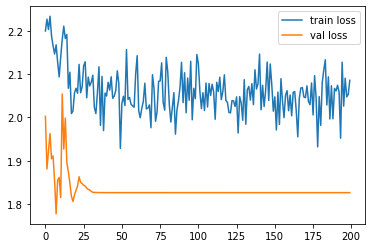

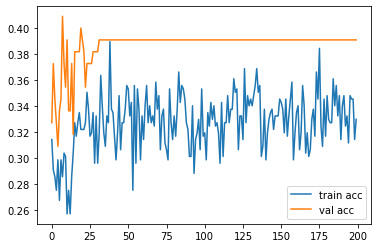

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
pred = model.predict(val_generator)
pred

4/4 [==============================] - 0s 7ms/step


array([[4.50246444e-04, 1.52497948e-03, 6.73834002e-04, ...,
        3.61299850e-02, 1.42311409e-01, 2.23727986e-01],
       [2.19378341e-02, 4.31947783e-02, 5.49845323e-02, ...,
        1.78294559e-03, 3.20064626e-03, 7.36749312e-03],
       [1.34387622e-15, 1.08358485e-13, 1.17672183e-11, ...,
        1.04173982e-16, 1.68229786e-21, 5.93750094e-28],
       ...,
       [3.75716835e-02, 1.98167213e-03, 1.19049540e-02, ...,
        7.15895891e-02, 3.60156153e-03, 9.68739241e-02],
       [1.99634098e-02, 3.06282397e-02, 4.59085265e-03, ...,
        1.54977283e-02, 2.56249569e-02, 2.00599253e-01],
       [2.08618758e-07, 9.94150937e-02, 9.73423564e-09, ...,
        1.06420053e-10, 1.26120931e-05, 1.68125553e-07]], dtype=float32)

In [14]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np

# Parameters
input_size = (28,28) # Bisa kalian ganti
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['a', 'b', 'c', 'd', 'e', 
          'f', 'g', 'h', 'i', 'j', 
          'k', 'l', 'm', 'n', 'o', 
          'p', 'q', 'r', 's', 't', 
          'u', 'v', 'w', 'x', 'y', 
          'z']
# labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [15]:
print(labels)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [16]:
def preprocess(img,input_size):
    img_arr = (np.array(img))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [59]:
model = load_model('model_braille_sendiri.h5')

In [62]:
# read image
rootdir = '/home/ichiro/KP_braille/images/a/'
for image in os.listdir(rootdir):
    im = Image.open(rootdir + image)
    X = preprocess(im,input_size)
    X = reshape([X])
    y = model.predict(X)
    print( labels[np.argmax(y)], np.max(y) )

1/1 [==============================] - 0s 55ms/step
a 0.25004444
1/1 [==============================] - 0s 12ms/step
a 0.24976183
1/1 [==============================] - 0s 11ms/step
a 0.2499278
1/1 [==============================] - 0s 11ms/step
a 0.2500909
1/1 [==============================] - 0s 11ms/step
a 0.24986093
1/1 [==============================] - 0s 19ms/step
a 0.24693301
1/1 [==============================] - 0s 12ms/step
a 0.25238416
1/1 [==============================] - 0s 12ms/step
a 0.24861178
1/1 [==============================] - 0s 11ms/step
a 0.24702063
1/1 [==============================] - 0s 13ms/step
a 0.24976183
1/1 [==============================] - 0s 12ms/step
a 0.24984562
1/1 [==============================] - 0s 11ms/step
a 0.25075313
1/1 [==============================] - 0s 12ms/step
a 0.25060174
1/1 [==============================] - 0s 11ms/step
a 0.24747592
1/1 [==============================] - 0s 12ms/step
a 0.25078148
1/1 [======================

In [23]:
y

array([[0.1442893 , 0.06317582, 0.10252789, 0.02610524, 0.05587863,
        0.04316627, 0.01148933, 0.0306098 , 0.04115222, 0.01202821,
        0.07218935, 0.05631194, 0.02920401, 0.01570179, 0.02971649,
        0.03163375, 0.02054424, 0.02636941, 0.037118  , 0.01336915,
        0.04045916, 0.02887296, 0.00532561, 0.02824382, 0.01415433,
        0.02036335]], dtype=float32)

In [38]:
test_loss, test_acc = model.evaluate(test_data, verbose=1)

49/49 [==============================] - 12s 249ms/step - loss: 3.5454 - accuracy: 0.0385
